<a href="https://colab.research.google.com/github/vjaswanthvarma/ML-projects/blob/main/USA_real_state_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [213]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [214]:
#Load the Model
data=pd.read_csv("/content/realtor-data.csv")
data.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [215]:
#Remove unimportant fatures
data=data.drop('status',axis=1)
data=data.drop('prev_sold_date',axis=1)
data=data.drop('zip_code',axis=1)

In [216]:
data.head()

,bed,bath,acre_lot,city,state,house_size,price
0,3.0,2.0,0.12,Adjuntas,Puerto Rico,920.0,105000.0
1,4.0,2.0,0.08,Adjuntas,Puerto Rico,1527.0,80000.0
2,2.0,1.0,0.15,Juana Diaz,Puerto Rico,748.0,67000.0
3,4.0,2.0,0.10,Ponce,Puerto Rico,1800.0,145000.0
4,6.0,2.0,0.05,Mayaguez,Puerto Rico,NaN,65000.0


In [217]:
data.describe()

,bed,bath,acre_lot,house_size,price
count,75050.000000,75112.000000,85987.000000,7.508200e+04,1.000000e+05
mean,3.701013,2.494595,13.613473,2.180082e+03,4.383656e+05
std,2.091372,1.573324,840.143878,5.625349e+03,1.015773e+06
min,1.000000,1.000000,0.000000,1.000000e+02,4.450000e+02
25%,3.000000,2.000000,0.190000,1.200000e+03,1.250000e+05
50%,3.000000,2.000000,0.510000,1.728000e+03,2.650000e+05
75%,4.000000,3.000000,2.000000,2.582000e+03,4.749000e+05
max,86.000000,56.000000,100000.000000,1.450112e+06,6.000000e+07


In [218]:
#observe the details of data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   bed         75050 non-null   float64
 1   bath        75112 non-null   float64
 2   acre_lot    85987 non-null   float64
 3   city        99948 non-null   object 
 4   state       100000 non-null  object 
 5   house_size  75082 non-null   float64
 6   price       100000 non-null  float64
dtypes: float64(5), object(2)
memory usage: 5.3+ MB


In [219]:
# Checking the null values in data set
data.isnull().sum()

bed           24950
bath          24888
acre_lot      14013
city             52
state             0
house_size    24918
price             0
dtype: int64

In [220]:
#Handling the null values
data['bed'].fillna(data['bed'].mean(),inplace=True)
data['bath'].fillna(data['bath'].mean(),inplace=True)
data['acre_lot'].fillna(data['acre_lot'].mean(),inplace=True)
data['city'].fillna("Not available",inplace=True)
data['house_size'].fillna(data['house_size'].mean(),inplace=True)

In [221]:
# After the Handling the null values we check is there any null values in data set or not?
data.isnull().sum()

bed           0
bath          0
acre_lot      0
city          0
state         0
house_size    0
price         0
dtype: int64

In [222]:
# Printing  last enteries of data set
data.tail()

,bed,bath,acre_lot,city,state,house_size,price
99995,3.0,3.0,13.613473,Hudson,Massachusetts,2864.0,749900.0
99996,2.0,1.0,0.340000,Auburn,Massachusetts,1075.0,349900.0
99997,3.0,2.0,1.010000,Shrewsbury,Massachusetts,1632.0,549000.0
99998,3.0,2.0,0.120000,Worcester,Massachusetts,1332.0,299000.0
99999,3.0,3.0,21.670000,Grafton,Massachusetts,1846.0,535000.0


In [223]:
# Once check null values
data.isnull().sum()

bed           0
bath          0
acre_lot      0
city          0
state         0
house_size    0
price         0
dtype: int64

<ipython-input-224-75940a6987af>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  a=data.corr()


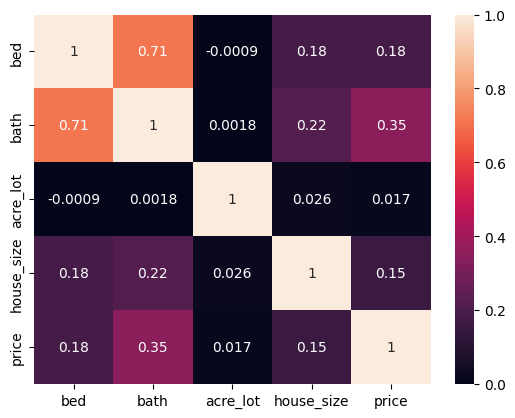

In [224]:
# Applying Correlation techinque
a=data.corr()
sns.heatmap(a,annot=True)
plt.show()

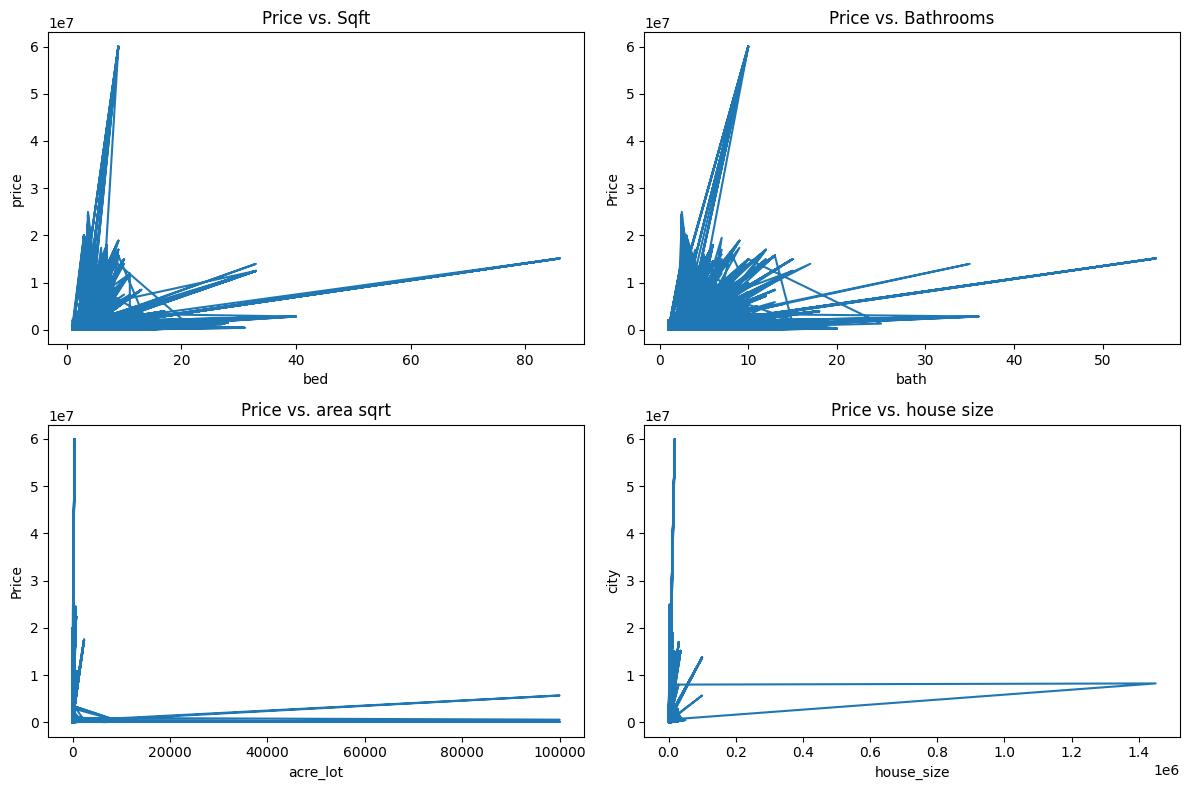

In [251]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0, 0].plot(data['bed'], data['price'])
axs[0, 0].set_xlabel('bed')
axs[0, 0].set_ylabel('price')
axs[0, 0].set_title('Price vs. Sqft')
axs[0, 1].plot(data['bath'], data['price'])
axs[0, 1].set_xlabel('bath')
axs[0, 1].set_ylabel('Price')
axs[0, 1].set_title('Price vs. Bathrooms')
axs[1, 0].plot(data['acre_lot'], data['price'])
axs[1, 0].set_xlabel('acre_lot')
axs[1, 0].set_ylabel('Price')
axs[1, 0].set_title('Price vs. area sqrt')
axs[1, 1].plot(data['house_size'], data['price'])
axs[1, 1].set_xlabel('house_size')
axs[1, 1].set_ylabel('city')
axs[1, 1].set_title('Price vs. house size')
plt.tight_layout()
plt.show()


In [226]:
# Identify the types of Classes in City feature
data['city'].value_counts()

San Juan       4788
Worcester      3291
Springfield    2888
Pittsfield     2147
Bayamon        1927
               ... 
Scotland          1
Plaistow          1
Niverville        1
Derry             1
Condado           1
Name: city, Length: 526, dtype: int64

In [227]:
# Identify the types of Classes in City feature
data['state'].value_counts()

Massachusetts     52694
Puerto Rico       24679
Connecticut       12178
Virgin Islands     2573
Rhode Island       2401
New Hampshire      2232
New York           1874
Vermont            1324
South Carolina       24
Tennessee            16
Virginia              3
New Jersey            2
Name: state, dtype: int64

In [228]:
# Converting the Strings into Numeric
a=preprocessing.LabelEncoder()
data['city']=a.fit_transform(data['city'])
data['state']=a.fit_transform(data['state'])

In [229]:
# After preprocessing the City feature
data['city'].value_counts()

392    4788
521    3291
425    2888
354    2147
35     1927
       ... 
402       1
358       1
316       1
118       1
102       1
Name: city, Length: 526, dtype: int64

In [230]:
# After preprocessing the State feature
data['state'].value_counts()

1     52694
5     24679
0     12178
10     2573
6      2401
2      2232
4      1874
9      1324
7        24
8        16
11        3
3         2
Name: state, dtype: int64

In [231]:
# Checking the data set is there any Strings or not?
data.head()

,bed,bath,acre_lot,city,state,house_size,price
0,3.0,2.0,0.12,2,5,920.000000,105000.0
1,4.0,2.0,0.08,2,5,1527.000000,80000.0
2,2.0,1.0,0.15,224,5,748.000000,67000.0
3,4.0,2.0,0.10,361,5,1800.000000,145000.0
4,6.0,2.0,0.05,268,5,2180.081737,65000.0


In [232]:
# Checking the data set is there any Null values or not? 
data.isnull().sum()

bed           0
bath          0
acre_lot      0
city          0
state         0
house_size    0
price         0
dtype: int64

In [233]:
#Seperate the  input and output features
x=data.drop('price',axis=1).values
y=data['price'].values

In [234]:
# spilting the entire data set into training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=30)

In [235]:
x_train.shape,x_test.shape

((70000, 6), (30000, 6))

In [236]:
# Creating an Object in LinearRegression model
lreg=LinearRegression()
lreg.fit(x_train,y_train)

LinearRegression()

In [237]:
# Predicting the Output
y_pred=lreg.predict(x_test)

In [238]:
#Evaluating the model performance
print("mean absolute error: ",mean_absolute_error(y_test,y_pred))
print("mean squared error: ",mean_squared_error(y_test,y_pred))
print("roor mean squared error: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2_score: ",r2_score(y_test,y_pred))

mean absolute error:  324824.1869200002
mean squared error:  994187931942.7917
roor mean squared error:  997089.7311389742
R2_score:  0.14642711455069735


By applying the multiple Regression on this Model,we get very less Accuracy that is approx 14 percent.So,we will must be improve the model Accuracy we need apply the Ridge Regularization and Lasso Regularization.This Regularization techinque is used remove the less effective features and make to increase the Accuracy of the Model.


In [239]:
from sklearn.linear_model import Ridge
rreg=Ridge(alpha=0.5)
rreg.fit(x_train,y_train);

In [240]:
ylpred=rreg.predict(x_test);

In [241]:
# Evaluate the model performance
print("Mean absolute error",mean_absolute_error(y_test,ylpred));
print("Mean square error",mean_squared_error(y_test,ylpred));
print("Root Means Squared error",np.sqrt(mean_squared_error(y_test,ylpred)));
print("R2 Score",r2_score(y_test,ylpred));

Mean absolute error 324823.5151074517
Mean square error 994188006201.7878
Root Means Squared error 997089.7683768437
R2 Score 0.14642705079467744


In [242]:
from sklearn.linear_model import Lasso
lreg=Lasso(alpha=0.12)
lreg.fit(x_train,y_train)

Lasso(alpha=0.12)

In [243]:
lrpred=lreg.predict(x_test);

In [244]:
#Evaluating the Model Performance
print("Mean absolute error",mean_absolute_error(y_test,lrpred));
print("Mean squared error",mean_squared_error(y_test,lrpred));
print("Root Mean err Squared error",np.array(mean_absolute_error(y_test,lrpred)));
print("r2 score",r2_score(y_test,lrpred));

Mean absolute error 324824.132341562
Mean squared error 994187934603.4572
Root Mean err Squared error 324824.132341562
r2 score 0.14642711226634875


In [245]:
# Creating an Object in RandomForestRegressor
lreg=RandomForestRegressor()
lreg.fit(x_train,y_train)

RandomForestRegressor()

In [246]:
# Predicting the Output
y1_pred=lreg.predict(x_test)

In [247]:
#Evaluating the Model Performance
print("mean absolute error: ",mean_absolute_error(y_test,y1_pred))
print("mean squared error: ",mean_squared_error(y_test,y1_pred))
print("root mean squared error: ",np.sqrt(mean_squared_error(y_test,y1_pred)))
print("R2_score: ",r2_score(y_test,y1_pred))

mean absolute error:  28549.807803600128
mean squared error:  62178473360.38467
root mean squared error:  249356.1175515545
R2_score:  0.946615868877686


In [248]:
# Creating an object in DecisionTreeRegressor
dreg=DecisionTreeRegressor(random_state=0)
dreg.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [249]:
y2_pred=dreg.predict(x_test)

In [250]:
# Evaluate the Model Performance
print("Mean absolute error",mean_absolute_error(y_test,y2_pred))
print("Mean squared error",mean_squared_error(y_test,y2_pred))
print("Root Means squared error",np.sqrt(mean_squared_error(y_test,y2_pred)));
print("r2 Score",r2_score(y_test,y2_pred))

Mean absolute error 26305.767890136118
Mean squared error 79235944174.088
Root Means squared error 281488.79937590414
r2 Score 0.9319709570726634
